In [2]:
import pandas as pd

data = pd.read_csv('playlist_exit_ticket.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   playlist                   24 non-null     object 
 1   tracks                     24 non-null     object 
 2   average_track_popularity   24 non-null     float64
 3   albums                     24 non-null     object 
 4   artists                    24 non-null     object 
 5   top_genre                  24 non-null     object 
 6   average_artist_popularity  24 non-null     float64
 7   average_danceability       24 non-null     float64
 8   top_key                    24 non-null     int64  
 9   average_tempo              24 non-null     float64
 10  top_time_signature         24 non-null     int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 2.2+ KB


In [3]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [4]:
features = data[['average_track_popularity', 'average_artist_popularity', 'average_danceability']]
scalar = StandardScaler()
features_scaled = scalar.fit_transform(features)

In [9]:
dbscan = DBSCAN(eps=1.1, min_samples=3)
cluster_labels = dbscan.fit_predict(features_scaled)

In [10]:
if len(set(cluster_labels)) > 1:
    score = silhouette_score(features_scaled, cluster_labels)
    print("Silhouette Score:", score)
else:
    print("Silhouette Score: Not applicable, only one cluster found.")

Silhouette Score: 0.46167587474439026


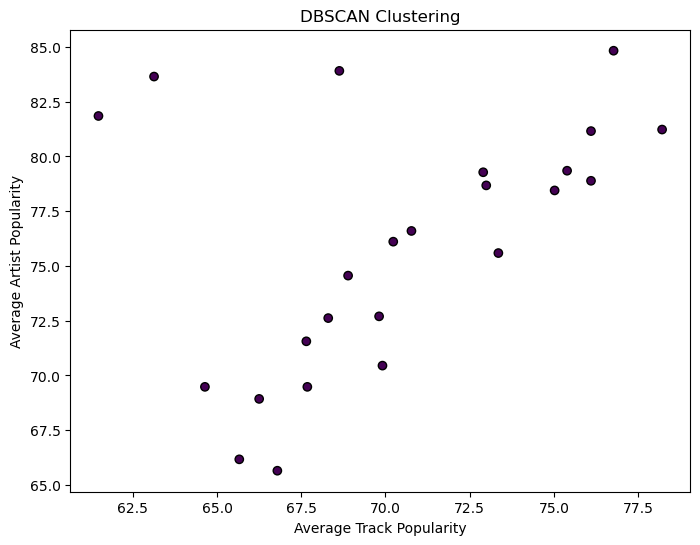

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(data['average_track_popularity'], data['average_artist_popularity'],
            c=cluster_labels, cmap='viridis', marker='o', edgecolor='k')
plt.xlabel('Average Track Popularity')
plt.ylabel('Average Artist Popularity')
plt.title('DBSCAN Clustering')
plt.show()

In [8]:
data.head()

,playlist,tracks,average_track_popularity,albums,artists,top_genre,average_artist_popularity,average_danceability,top_key,average_tempo,top_time_signature
0,Playlist 1,"['Oops!...I Did It Again', 'All The Small Thin...",65.66,"['Oops!... I Did It Again', 'Enema Of The Stat...","['Britney Spears', 'blink-182', 'Faith Hill', ...",'dancepop',66.17,0.65875,0,122.75544,4
1,Playlist 2,"[""It Wasn't Me"", 'Murder On The Dancefloor', '...",66.79,"['Hot Shot', 'Read My Lips', 'The Marshall Mat...","['Shaggy', 'Sophie Ellis-Bextor', 'Eminem', 'K...",'dancepop',65.65,0.67281,1,115.99193,4
2,Playlist 3,"['Dilemma', 'Without Me', 'Complicated', 'A Th...",64.64,"['Nellyville', 'The Eminem Show', 'Let Go', 'B...","['Nelly', 'Eminem', 'Avril Lavigne', 'Vanessa ...",'dancepop',69.48,0.65076,2,119.75400,4
3,Playlist 4,"['In Da Club', 'Seven Nation Army', 'Lose Your...",66.25,"[""Get Rich Or Die Tryin'"", 'Elephant', 'Curtai...","['50 Cent', 'The White Stripes', 'Eminem', 'Be...",'dancepop',68.93,0.66311,6,116.05242,4
4,Playlist 5,"['Yeah! (feat. Lil Jon & Ludacris)', 'This Lov...",67.68,"['Confessions (Expanded Edition)', 'Songs Abou...","['USHER', 'Maroon 5', 'Rascal Flatts', 'Britne...",'dancepop',69.48,0.66997,1,117.81705,4
